## Importing Necessary Libraries

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

import warnings
warnings.filterwarnings('ignore')

In [278]:
!pip install tensorflow

In [279]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras import Input

In [280]:
!pip install opencv-python

In [281]:
import cv2

## Conversion of Images into Vectors

In [282]:
import cv2
import numpy as np

def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Could not read {path}")
        return None

    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32) / 255.0
    return img

# Example usage:
image = load_image(r"C:\Users\mahit\OneDrive\Desktop\Multi Cancer\Multi Cancer\Brain Cancer\brain_tumor\brain_tumor_0091.jpg")


In [283]:
image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01960784, 0.02745098,
        0.00784314],
       [0.        , 0.        , 0.        , ..., 0.02352941, 0.02745098,
        0.00784314],
       [0.        , 0.        , 0.        , ..., 0.02745098, 0.03137255,
        0.01176471]], dtype=float32)

In [284]:
import cv2
import numpy as np
import os

# Base folder
base_folder = r"C:\Users\mahit\OneDrive\Desktop\example plots"

# Subfolders for each class
brain_glioma_folder = os.path.join(base_folder, 'brain_glioma')
brain_menin_folder = os.path.join(base_folder, 'brain_menin')
brain_tumor_folder = os.path.join(base_folder, 'brain_tumor')

# Function to get full image paths from a folder
def get_image_paths(folder):
    return [os.path.join(folder, filename) 
            for filename in os.listdir(folder) 
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Could not read {path}")
            continue
        img = cv2.resize(img, (224, 224))
        img = img.astype(np.float32) / 255.0
        
        images.append(img)
    return images

# Get image paths
brain_glioma_paths = get_image_paths(brain_glioma_folder)
brain_menin_paths = get_image_paths(brain_menin_folder)
brain_tumor_paths = get_image_paths(brain_tumor_folder)

# Load images
brain_glioma = load_images(brain_glioma_paths)
brain_menin = load_images(brain_menin_paths)
brain_tumor = load_images(brain_tumor_paths)

# Optional: print summary
print(f"Glioma images loaded: {len(brain_glioma)}")
print(f"Menin images loaded: {len(brain_menin)}")
print(f"Tumor images loaded: {len(brain_tumor)}")



Glioma images loaded: 990
Menin images loaded: 990
Tumor images loaded: 990


In [285]:
brain_glioma

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
         0.        ],
        [0.     

## Preprocessing Data

In [286]:
# Assign labels
brain_glioma_labels = [0] * len(brain_glioma)
brain_menin_labels = [1] * len(brain_menin)
brain_tumor_labels = [2] * len(brain_tumor)

# Combine data and labels
X = np.array(brain_glioma + brain_menin + brain_tumor, dtype=np.float32)[..., np.newaxis]
y = brain_glioma_labels + brain_menin_labels + brain_tumor_labels
y = to_categorical(y, num_classes=3)


In [287]:
from sklearn.model_selection import train_test_split

# Assuming X is (N, 224, 224, 1) and y is one-hot encoded (N, 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test set
    random_state=42,     # For reproducibility
    shuffle=True         # Shuffle before splitting
)

In [288]:
X_train.shape

(2376, 224, 224, 1)

In [289]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [290]:
datagen = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode="nearest"
)
datagen.fit(X_train_1)

## Convolutional Neural Network Model and Training

In [291]:
model = Sequential([
    
    Input(shape=(224, 224, 1)), #Defines input layers in functional API.

    # 3 Convolutional layers (Extracts important features from images (edges, textures, patterns). 
    # Applies filters (kernels) to scan different regions of the image.
    
    # [Maxpooling] - Reduces image size while keeping important features.
    # Picks the largest value from small regions of the image.
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),

    # [dropout] - Reduces overfitting by randomly disabling 50% of neurons.
    # This forces the network to learn robust features rather than memorizing training data.
    # Helps generalization by preventing dependency on specific neurons.
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [292]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,168,771 (42.61 MB)

 Trainable params: 11,168,771 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [293]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [294]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_1, y_train_1)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    verbose=1
) 

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.5153 - loss: 1.0083 - val_accuracy: 0.6534 - val_loss: 0.6993
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.6452 - loss: 0.7497 - val_accuracy: 0.7647 - val_loss: 0.5619
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7212 - loss: 0.6302 - val_accuracy: 0.7773 - val_loss: 0.5561
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7695 - loss: 0.5472 - val_accuracy: 0.7269 - val_loss: 0.5915
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8129 - loss: 0.4707 - val_accuracy: 0.7710 - val_loss: 0.5737
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.8258 - loss: 0.4050 - val_accuracy: 0.7899 - val_loss: 0.5691
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8641 - loss: 0.3378 - val_accuracy: 0.7836 - val_loss: 0.6619
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8853 - loss: 0.2656 - val_accuracy: 0.7332 - v

In [295]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_layer = Input(shape=(224, 224, 3))  
x = Conv2D(32, (3, 3), activation='relu', name='conv2d')(input_layer)
x = MaxPooling2D((2, 2), name='max_pooling2d')(x)
x = Conv2D(64, (3, 3), activation='relu', name='conv2d_1')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_1')(x)
x = Conv2D(128, (3, 3), activation='relu', name='conv2d_2')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_2')(x)
x = Flatten(name='flatten')(x)
x = Dense(128, activation='relu', name='dense')(x)
x = Dropout(0.5, name='dropout')(x)
output = Dense(3, activation='softmax', name='dense_1')(x)

model = Model(inputs=input_layer, outputs=output)

## Feature Map Visualization of a random data point

In [296]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess one image
img_path = r"C:\Users\mahit\OneDrive\Desktop\Multi Cancer\Multi Cancer\Brain Cancer\brain_tumor\brain_tumor_0091.jpg" 
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0 
image = img_array 

## Extracting FM from first Convolution Layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


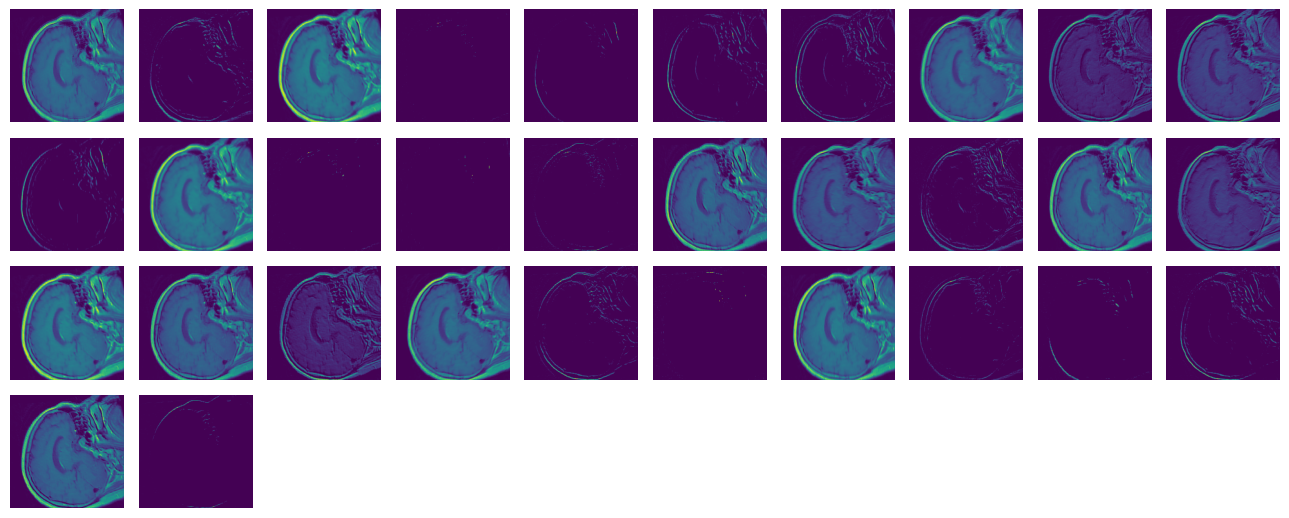

In [297]:
# Creating a sub-model to extract feature maps from 'conv2d_2'
activation_model = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)

image = img 
image_batch = np.expand_dims(image, axis=0)

# Geting feature maps
feature_maps = activation_model.predict(image_batch)

# Visualize first few feature maps
n_features = min(90, feature_maps.shape[-1])  # show up to 16
plt.figure(figsize=(13, 13))
for i in range(n_features):
    plt.subplot(10,10, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.tight_layout()
plt.savefig("feature_maps_2.png", dpi=300, bbox_inches='tight')
plt.show()

## Extracting FM from second Convolution Layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


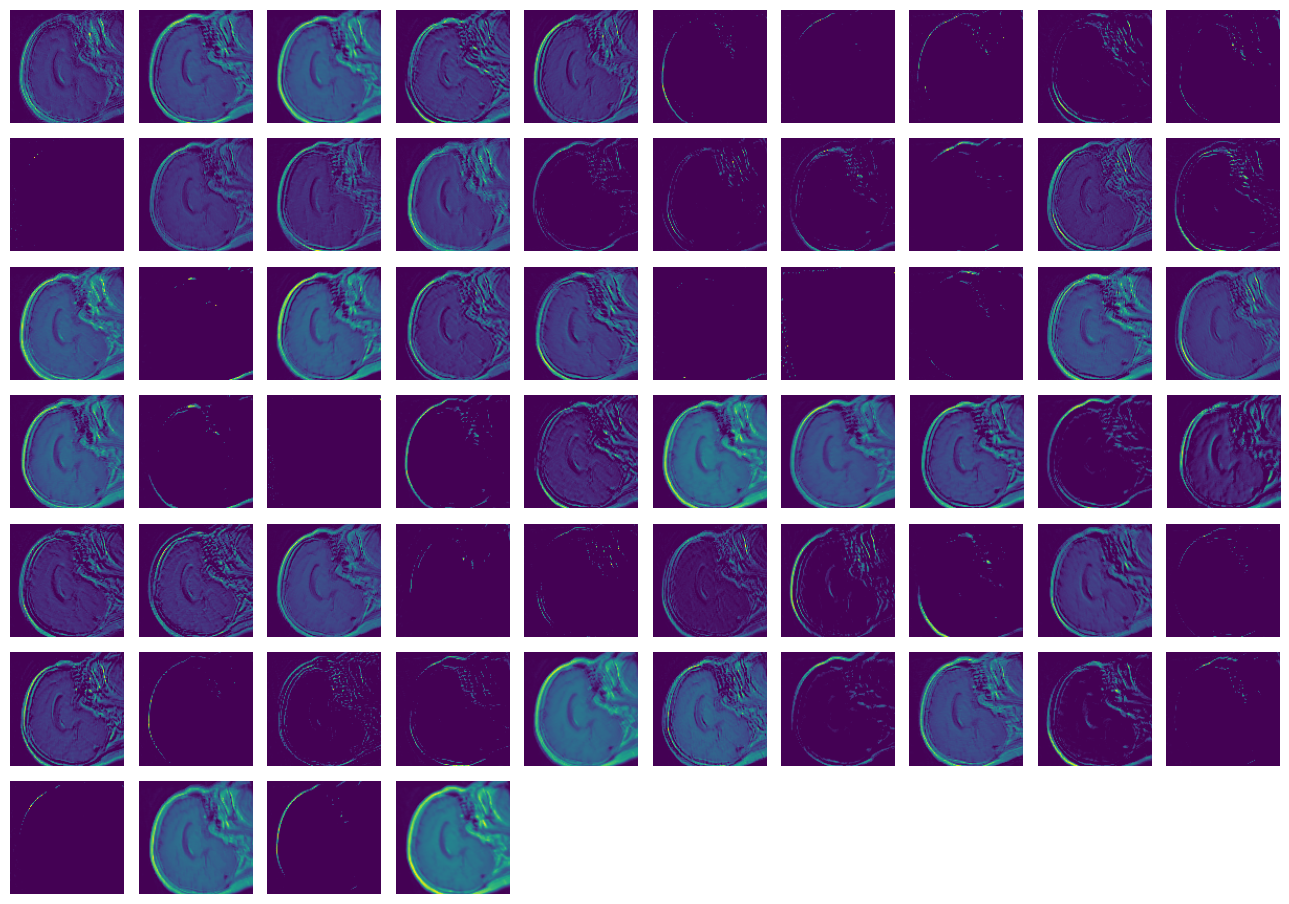

In [298]:
# Creating a sub-model to extract feature maps from 'conv2d_2'
activation_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)

image = img 
image_batch = np.expand_dims(image, axis=0)

# Geting feature maps
feature_maps = activation_model.predict(image_batch)

# Visualize first few feature maps
n_features = min(90, feature_maps.shape[-1])  # show up to 16
plt.figure(figsize=(13, 13))
for i in range(n_features):
    plt.subplot(10,10, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.tight_layout()
plt.savefig("feature_maps_2.png", dpi=300, bbox_inches='tight')
plt.show()

## Extracting FM from third Convolution Layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


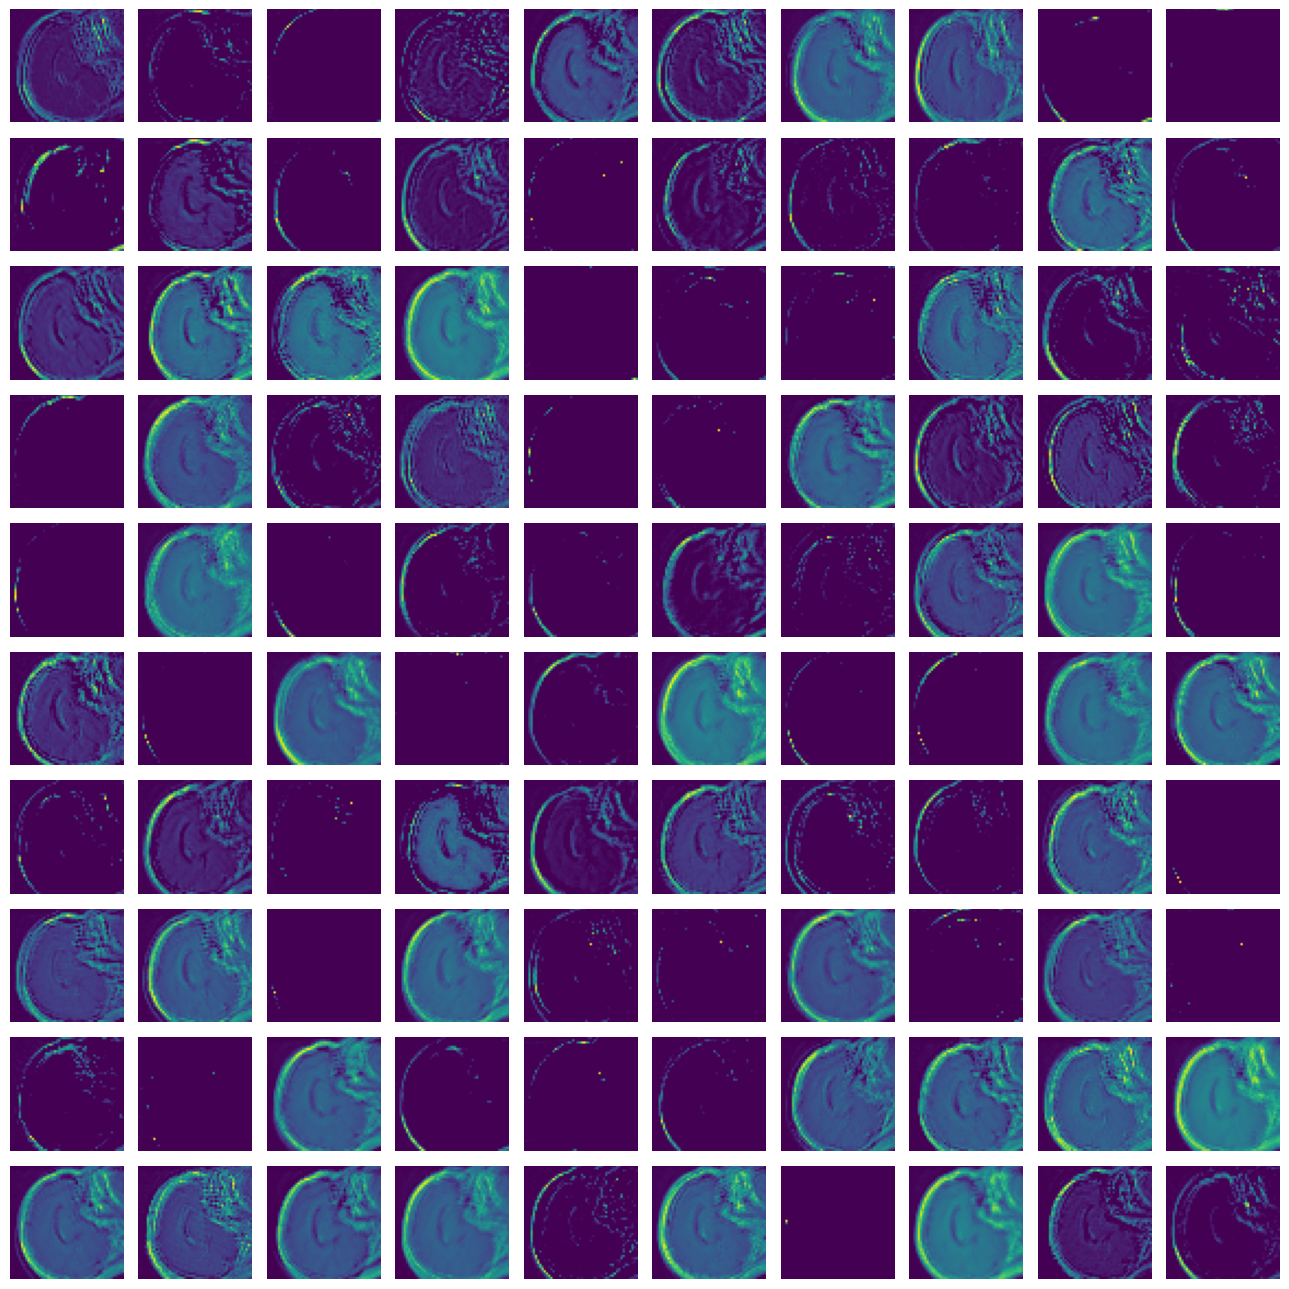

In [299]:
# Creating a sub-model to extract feature maps from 'conv2d_2'
activation_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)

image = img 
image_batch = np.expand_dims(image, axis=0)

# Geting feature maps
feature_maps = activation_model.predict(image_batch)

# Visualize first few feature maps
n_features = min(100, feature_maps.shape[-1])  # show up to 16
plt.figure(figsize=(13, 13))
for i in range(n_features):
    plt.subplot(10,10, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.tight_layout()
plt.savefig("feature_maps_2.png", dpi=300, bbox_inches='tight')
plt.show()

## Respective Layers' Kernels (3x3) [cmap: Viridis]

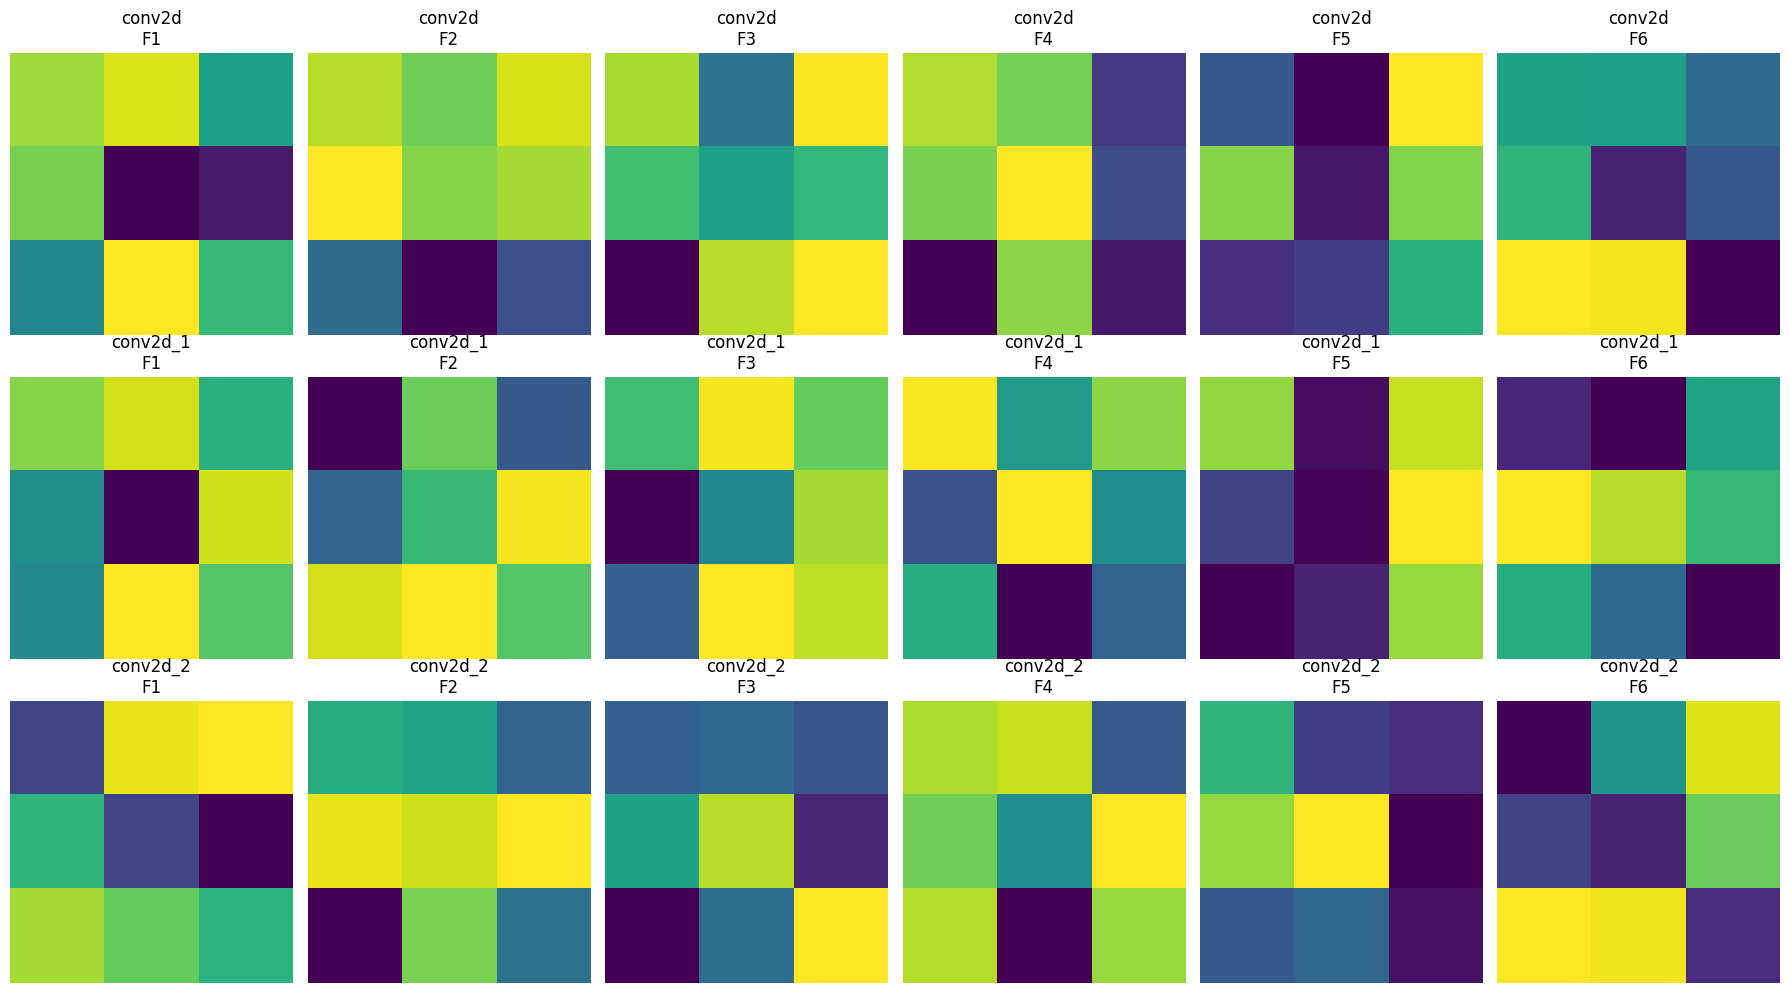

In [309]:
import numpy as np
import matplotlib.pyplot as plt

# Convert PIL image to numpy array and normalize
image = np.array(img).astype(np.float32)
if image.max() > 1.0:
    image /= 255.0

# Expand dims to make it batch of 1
image_batch = np.expand_dims(image, axis=0)

# Helper function to plot filters
def plot_conv_filters(layer_name, num_filters=6):
    filters, biases = model.get_layer(layer_name).get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    plt.figure(figsize=(12, 2.5))
    for i in range(num_filters):
        f = filters[:, :, 0, i]  # Visualizing first input channel
        plt.subplot(1, num_filters, i+1)
        plt.imshow(f, cmap='inferno')
        plt.title(f'{layer_name}\nFilter {i+1}')
        plt.axis('off')
    plt.tight_layout()

# Plot filters for each conv layer
plt.figure(figsize=(18, 10))

for idx, layer in enumerate(['conv2d', 'conv2d_1', 'conv2d_2']):
    filters, _ = model.get_layer(layer).get_weights()
    filters = (filters - filters.min()) / (filters.max() - filters.min())
    
    n_filters = 6
    for i in range(n_filters):
        f = filters[:, :, 0, i]
        plt.subplot(3, n_filters, idx * n_filters + i + 1)
        plt.imshow(f, cmap='viridis')
        plt.title(f'{layer}\nF{i+1}')
        plt.axis('off')

plt.tight_layout()
plt.savefig("all_conv_filters.png", dpi=300)
plt.show()


In [303]:
from tensorflow.keras.models import Model

layer_name = 'conv2d_2'
activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
activations = activation_model.predict(image_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


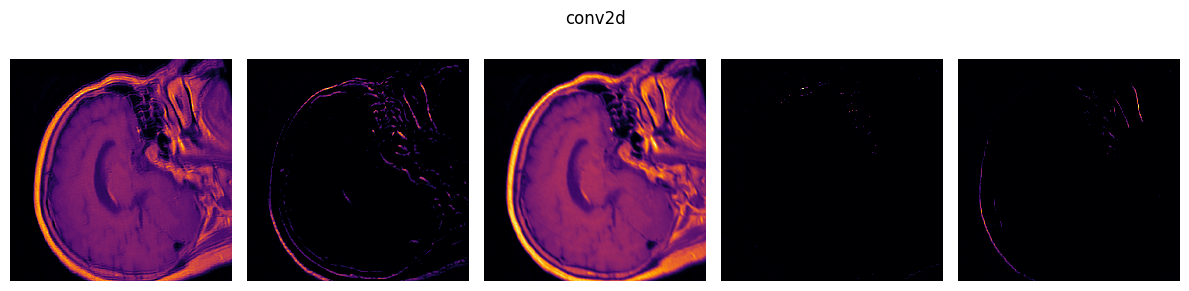

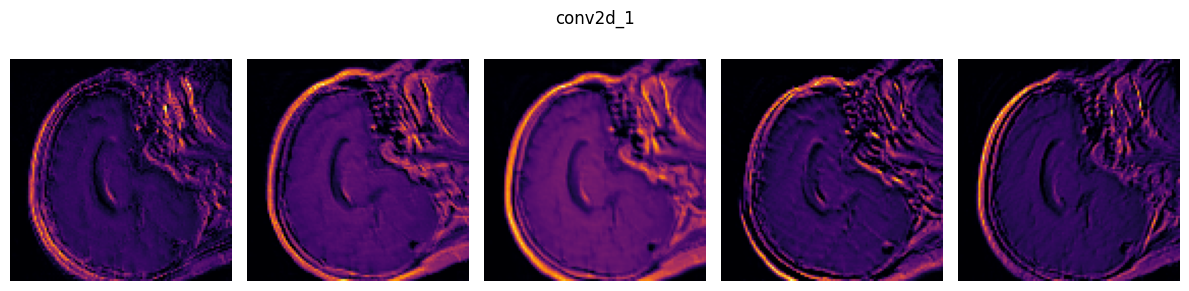

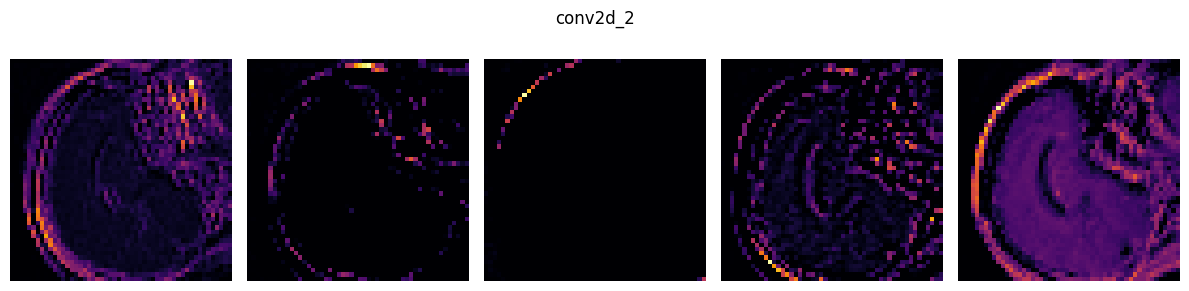

In [374]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image_batch)

# Plot for each layer
for layer_name, layer_activation in zip([layer.name for layer in model.layers if 'conv' in layer.name], activations):
    n_features = min(5, layer_activation.shape[-1])
    plt.figure(figsize=(12, 3))
    for i in range(n_features):
        plt.subplot(1, n_features, i+1)
        plt.imshow(layer_activation[0, :, :, i], cmap='inferno')
        plt.axis('off')
    plt.suptitle(layer_name)
    plt.tight_layout()
    plt.show()


## Receptive Field Visualization

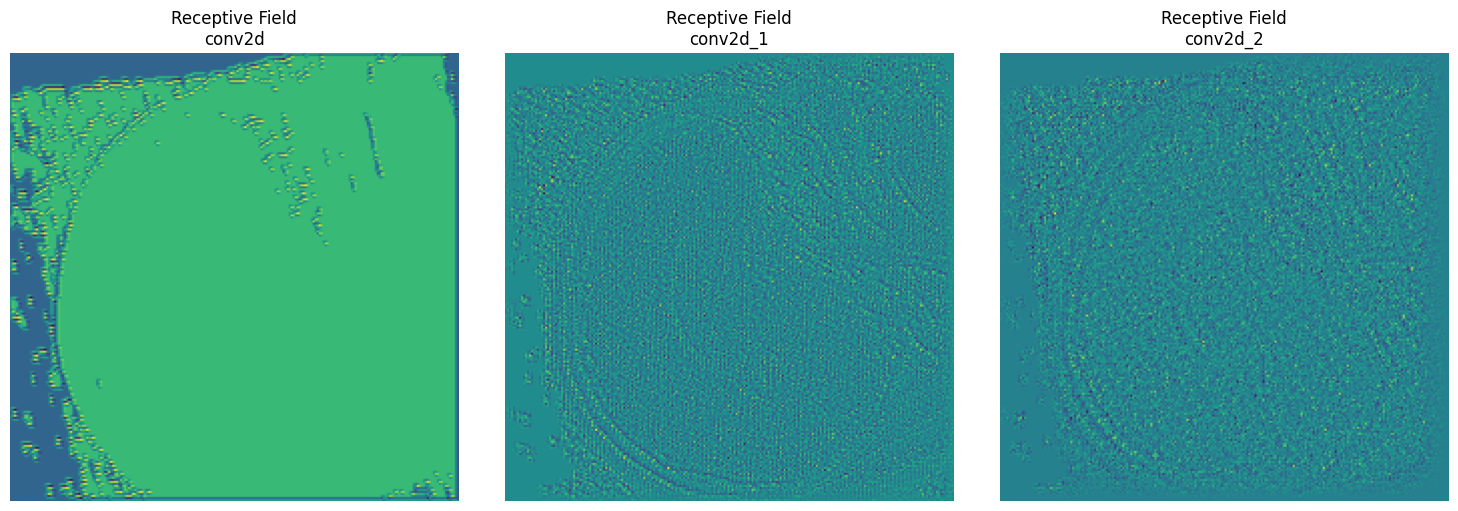

In [305]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Layers to visualize
conv_layers = ['conv2d', 'conv2d_1', 'conv2d_2']

# Preprocess image
image = img  # grayscale image (H, W) e.g., (224, 224)
image = np.expand_dims(image, axis=-1)  # (H, W, 1)
image = np.expand_dims(image, axis=0)   # (1, H, W, 1)
image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)

# Create figure
plt.figure(figsize=(15, 5))

for i, layer_name in enumerate(conv_layers):
    # Create model to get activation
    activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        activation = activation_model(image_tensor)
        loss = tf.reduce_mean(activation[:, :, :, 0])  # first channel

    grads = tape.gradient(loss, image_tensor)[0, :, :, 0].numpy()

    # Normalize gradients
    grads = (grads - grads.min()) / (grads.max() - grads.min() + 1e-8)

    # Plot each heatmap
    plt.subplot(1, len(conv_layers), i+1)
    plt.imshow(grads, cmap='viridis')
    plt.title(f'Receptive Field\n{layer_name}')
    plt.axis('off')

plt.tight_layout()
plt.savefig("receptive_field_all_layers.png", dpi=300, bbox_inches='tight')
plt.show()


## Grad-CAM Visualization

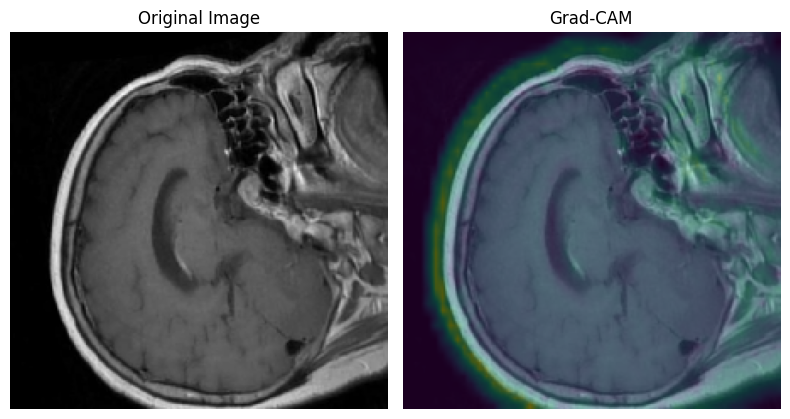

In [394]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array

def get_gradcam_heatmap(model, image, layer_name, class_index=None):
    # Ensure image is NumPy array and normalized
    if not isinstance(image, np.ndarray):
        image = img_to_array(image)

    if image.max() > 1.0:
        image = image.astype('float32') / 255.0

    img_array = np.expand_dims(image, axis=0)

    # Grad model
    grad_model = Model(inputs=model.input, outputs=[
        model.get_layer(layer_name).output,
        model.output
    ])

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    conv_outputs = conv_outputs[0]

    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

    # Normalize and resize
    heatmap = np.maximum(cam, 0) / (tf.reduce_max(cam) + 1e-8)
    heatmap = tf.image.resize(heatmap[..., tf.newaxis], (image.shape[0], image.shape[1])).numpy()
    return heatmap[..., 0]

def overlay_heatmap(image, heatmap, alpha=0.4, cmap='viridis'):
    if not isinstance(image, np.ndarray):
        image = img_to_array(image)

    if image.max() > 1.0:
        image = image / 255.0

    if image.shape[-1] == 1:  # if grayscale, convert to RGB
        image = np.repeat(image, 3, axis=-1)

    heatmap_colored = plt.cm.get_cmap(cmap)(heatmap)
    heatmap_colored = np.delete(heatmap_colored, 3, axis=2)  # remove alpha
    superimposed_img = image * (1 - alpha) + heatmap_colored * alpha
    return np.clip(superimposed_img, 0, 1)

# --- USAGE ---
# Assuming `image` is a PIL image or NumPy array
# and `model` is your compiled Keras model

# Convert PIL image if needed
# from PIL import Image
# image = Image.open("path/to/image.jpg")  # or already a NumPy array

heatmap = get_gradcam_heatmap(model, image, layer_name='conv2d_2')
result = overlay_heatmap(image, heatmap)

# Plot original and Grad-CAM side by side
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Grad-CAM")
plt.axis("off")

plt.tight_layout()
plt.savefig("gradcam_subplots.png", dpi=300)
plt.show()
